# 과제 2: GenAI 인사이트 추출
GenAI를 통해 비트코인 데이터에서 심화된 인사이트를 도출하고, 비즈니스적 가치를 제안합니다.

# 1. API 설정 및 데이터 로드

In [1]:
import os

# OpenAI API 키 설정
os.environ["OPENAI_API_KEY"] = ""

# 2. 데이터 로드 및 LangChain 설정

In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

# 데이터 로드
# read_csv() 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# delimiter: 데이터 구분자. 데이터가 ';'으로 구분되어 있으므로 delimiter=';'로 설정합니다.
df = pd.read_csv('./Bitcoin_Historical_Data_Sept-Nov_2024.csv', delimiter=';')

# LangChain의 Chat 모델 및 DataFrame Agent 생성
# ChatOpenAI: OpenAI API를 사용하여 자연어 처리를 수행하는 Chat 모델입니다.
# ChatOpenAI() 참고: https://python.langchain.com/docs/integrations/chat/openai/#invocation
chat = ChatOpenAI(model_name="gpt-4o-mini")
# create_pandas_dataframe_agent(): Chat 모델과 데이터프레임을 연결하여 데이터 분석을 수행하는 Agent를 생성합니다.
# create_pandas_dataframe_agent() 참고: https://python.langchain.com/api_reference/experimental/agents/langchain_experimental.agents.agent_toolkits.pandas.base.create_pandas_dataframe_agent.html
# create_pandas_dataframe_agent()의 주요 매개변수:
# - llm 인자: agent가 사용할 Chat 모델입니다. 이 경우, 위에서 생성한 chat 모델을 사용합니다.
# - df 인자: 분석할 데이터프레임입니다. 이 경우, 위에서 불러온 df 데이터프레임을 사용합니다.
# - allow_dangerous_code 인자: 위험한 코드를 실행할 수 있는지 여부를 설정합니다. 이 경우, True로 설정합니다.
# TODO: create_pandas_dataframe_agent() 함수 속 올바른 인자들을 채워주세요.
agent = create_pandas_dataframe_agent(llm=chat, df=df, allow_dangerous_code=True)

# 3. 상관관계 분석 요청

In [6]:
# 거래량과 종가 간의 상관관계 분석 요청
# TODO: agent에게 요청을 보내고 결과를 반환하는 함수를 작성해주세요.
correlation = agent.invoke("거래량(volume)과 종가(close)의 상관관계를 분석해 주세요.")
correlation


{'input': '거래량(volume)과 종가(close)의 상관관계를 분석해 주세요.',
 'output': 'The correlation coefficient between trading volume and closing price is approximately 0.173, indicating a weak positive correlation.'}

# 4. 이상치 탐지 및 설명

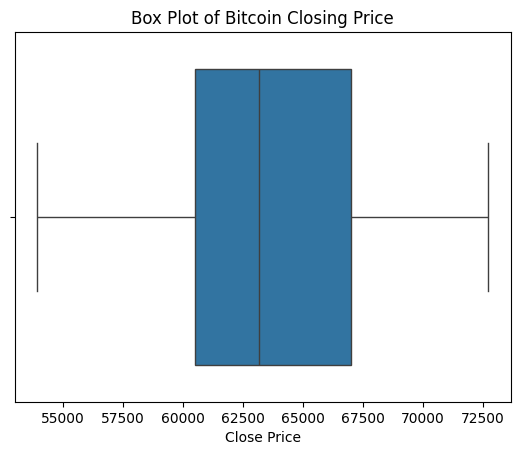

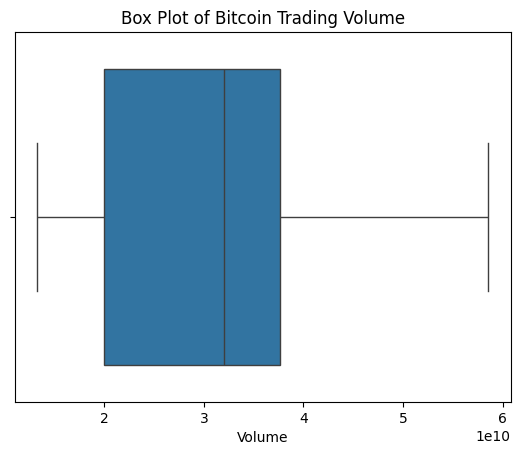

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 종가의 Box Plot을 통해 이상치 확인
# 이 문제에선 close, volume 두 개의 feature에 대해 box plot을 그려 이상치를 확인합니다.
sns.boxplot(x=df['close'])
plt.title('Box Plot of Bitcoin Closing Price')
plt.xlabel('Close Price')
plt.show()

# 거래량의 Box Plot을 통해 이상치 확인
sns.boxplot(x=df['volume'])
plt.title('Box Plot of Bitcoin Trading Volume')
plt.xlabel('Volume')
plt.show()


# 5. 상위 거래량 날짜 패턴 분석


In [8]:
# 상위 거래량 날짜 패턴 분석 요청
# TODO: agent에게 요청을 보내고 결과를 반환하는 함수를 작성해주세요.
top_volume_patterns = agent.invoke("거래량이 높은 상위 날짜의 가격 변동과 관련된 이유를 설명해 주세요.")
top_volume_patterns

{'input': '거래량이 높은 상위 날짜의 가격 변동과 관련된 이유를 설명해 주세요.',
 'output': 'To explain the reasons for high trading volume on specific dates, factors such as market news, price volatility, market sentiment, seasonal trends, and technical indicators should be considered. Please check the top volume dates using the suggested code to analyze their price changes.'}

# 6. 비즈니스 인사이트 제안


In [10]:
# LangChain Agent를 통해 비즈니스 인사이트 요약 요청
# TODO: agent에게 요청을 보내고 결과를 반환하는 함수를 작성해주세요.
business_insights = agent.invoke("이 데이터에서 도출할 수 있는 주요 비즈니스 인사이트를 한글로 요약해 주세요.")
business_insights


{'input': '이 데이터에서 도출할 수 있는 주요 비즈니스 인사이트를 한글로 요약해 주세요.',
 'output': '이 데이터에서 도출할 수 있는 주요 비즈니스 인사이트는 가격 변동성, 거래량의 활발함, 시가총액 변화, 최고 및 최저 가격 범위, 그리고 트렌드 분석 가능성입니다.'}

# 7. 거래량과 종가 관계 시각화


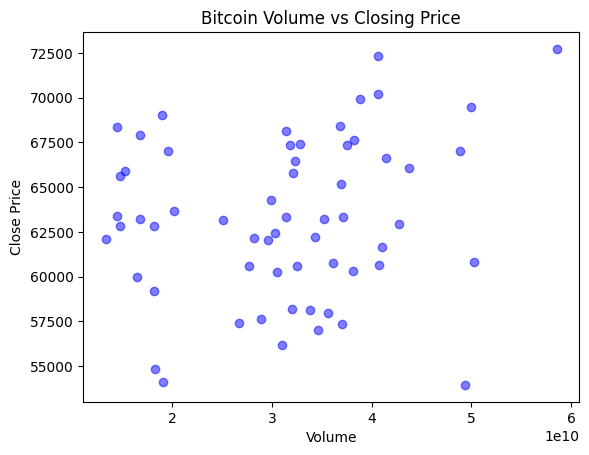

In [11]:
# 거래량과 종가의 산점도 시각화
# 이 문제에선 close, volume 두 개의 feature에 대해 scatter plot을 그려 관계를 확인합니다.
plt.scatter(df['volume'], df['close'], c='blue', alpha=0.5)
plt.title('Bitcoin Volume vs Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()
